In [1]:
# Example 1 - isnull

In [2]:
import pandas as pd
import numpy as np
# Load the iris dataset
from sklearn.datasets import load_iris

In [3]:
# Create a DataFrame
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add a few NaN values
df.iloc[2, 1] = np.nan
df.iloc[3, 2] = np.nan

# Check for missing values
print(df.isnull().sum())

sepal length (cm)    0
sepal width (cm)     1
petal length (cm)    1
petal width (cm)     0
dtype: int64


In [4]:
# Fill missing values with the mean of the column
df['sepal width (cm)'].fillna(df['sepal width (cm)'].mean(), inplace=True)
df['petal length (cm)'].fillna(df['petal length (cm)'].mean(), inplace=True)

print(df.isnull().sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


/var/folders/zz/qkcs__mj131c3rpjqqsq6kgh0000gn/T/ipykernel_16913/3513625950.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sepal width (cm)'].fillna(df['sepal width (cm)'].mean(), inplace=True)
/var/folders/zz/qkcs__mj131c3rpjqqsq6kgh0000gn/T/ipykernel_16913/3513625950.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which 

In [5]:
# 결측치 삭제
df.dropna(inplace=True)


In [6]:
# Example 2 - Z score

In [7]:
from scipy import stats
import numpy as np
from sklearn.datasets import load_iris

df = load_iris(as_frame=True)['data']

# Add an outlier
df.iloc[0, 0] = 100

# Calculate the z-scores
z_scores = stats.zscore(df)
abs_z_scores = np.abs(z_scores)

# Remove the outliers
filtered_entries = (abs_z_scores < 3)
df_no_outliers = df[filtered_entries]

In [8]:
df_no_outliers

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,NaN,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


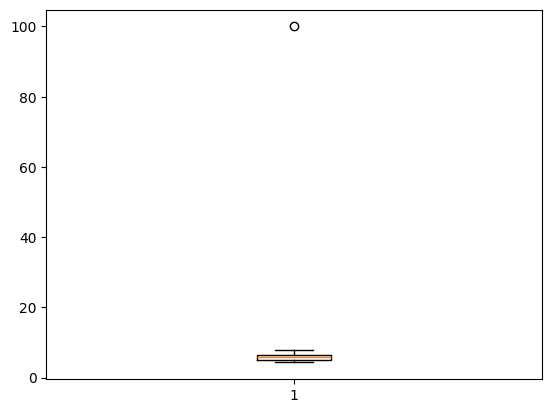

In [9]:
# visualize the outliers
import matplotlib.pyplot as plt
plt.boxplot(df['sepal length (cm)'])
plt.show()


In [10]:
# Example 3 - Impute missing values

In [11]:
df = load_iris(as_frame=True)['data']

# Add an outlier
df.iloc[0, 0] = 100

# Calculate the IQR
Q1 = df['sepal length (cm)'].quantile(0.25)
Q3 = df['sepal length (cm)'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove the outliers
df_no_outliers = df[(df['sepal length (cm)'] > lower_bound) & (df['sepal length (cm)'] < upper_bound)]


In [12]:
df_no_outliers

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [13]:
# Example 4 - Min-Max Scaling

In [14]:
from sklearn.preprocessing import MinMaxScaler

df = load_iris(as_frame=True)['data']

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(
    df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']])


{'whiskers': [<matplotlib.lines.Line2D at 0x120da1c50>,
 'caps': [<matplotlib.lines.Line2D at 0x120dbba50>,
 'boxes': [<matplotlib.lines.Line2D at 0x120db99d0>,
 'medians': [<matplotlib.lines.Line2D at 0x120dc5150>,
 'fliers': [<matplotlib.lines.Line2D at 0x120dc5bd0>,
 'means': []}

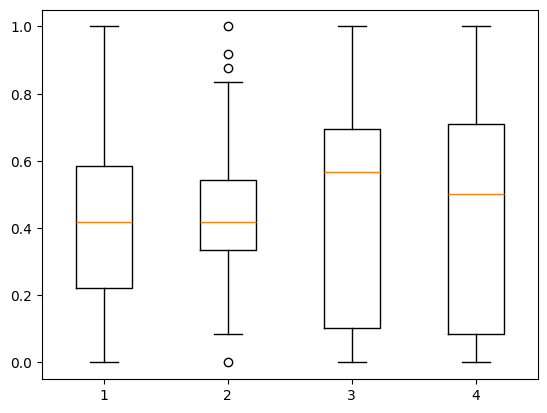

In [15]:
# visualize the scaled data
import matplotlib.pyplot as plt
plt.boxplot(scaled_data)

In [16]:
# Example 5 - Standardization

In [17]:
from sklearn.preprocessing import StandardScaler

df = load_iris(as_frame=True)['data']

# Standardize the data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(
    df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']])


<Axes: ylabel='Count'>

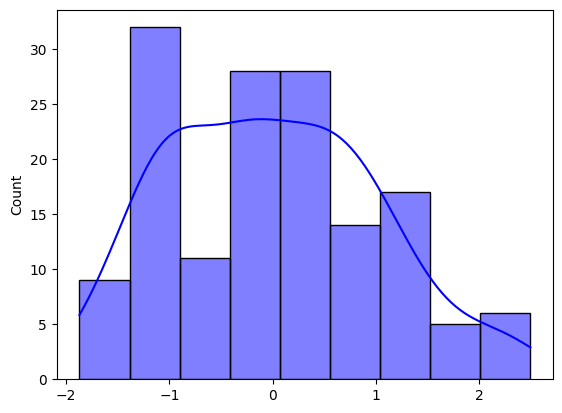

In [18]:
import seaborn as sns
sns.histplot(standardized_data[:, 0], kde=True, color='blue')

In [19]:
# Example 6 - PCA

In [20]:
from sklearn.datasets import fetch_california_housing
from sklearn.decomposition import PCA
import pandas as pd

In [21]:
df = fetch_california_housing(as_frame=True)['data']
target = fetch_california_housing()['target']

features = df

# Create a PCA instance
pca = PCA(n_components=2)
pca_features = pca.fit_transform(features)

print(pca_features)

[[-1103.51264821     8.56663624]
 [  975.54124442    -4.67041774]
 [ -929.54990812    20.03465092]
 ...
 [ -418.43757543   -12.90825582]
 [ -684.43952537   -12.79458051]
 [  -38.43624736   -12.67037806]]


In [22]:
pca_features[0]

array([-1103.51264821,     8.56663624])

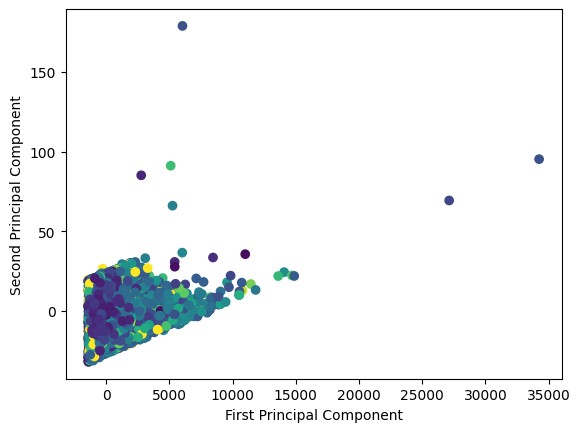

In [23]:
# visualize the PCA
import matplotlib.pyplot as plt
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=target)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [24]:
# Example 7 - SelectKBest

In [25]:
from sklearn.feature_selection import SelectKBest, f_classif

features = df
target = fetch_california_housing()['target']

# Create a SelectKBest instance
selector = SelectKBest(score_func=f_classif, k=5)
selected_features = selector.fit_transform(features, target)

# Print the selected features
# print(selected_features)

# print selected features
selected_features_names = df.columns[selector.get_support()]
print(selected_features_names)

Index(['MedInc', 'HouseAge', 'Population', 'Latitude', 'Longitude'], dtype='object')
